In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from uncertainties import unumpy as unp
from uncertainties import ufloat, umath
from options import *
from constants import *

mpl.rcParams.update(rcParams)

# Frigorifique

In [2]:
def load(filename: str):
    return pd.read_csv(filename, header=None, skiprows=1)

In [3]:
mesures = load("../data/machine-frigo.csv")
print(mesures)

       0      1     2    3       4     5
0  229.3  0.248  4.00  1.0   75.14  18.9
1  226.8  0.241  5.75  1.5  125.00  21.0
2  227.5  0.252  7.00  2.0  163.20  26.0
3  229.1  0.284  8.00  2.0  208.20  25.0
4  228.8  0.322  9.00  2.5  247.40  28.0
5  229.8  0.235  4.50  1.0   76.42  25.0
6  229.0  0.219  6.00  1.5  118.60  25.0
7  229.0  0.265  7.50  2.0  180.80  25.0


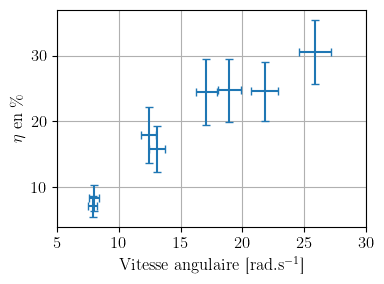

In [4]:
Umot = unp.uarray(mesures[0], 0.05)
Imot = unp.uarray(mesures[1], 0.05)
Pmot = Umot*Imot

Ufil = unp.uarray(mesures[2], 0.05)
Ifil = unp.uarray(mesures[3], 0.1)
Pfil = Ufil*Ifil

rend = Pfil/Pmot

w = unp.uarray(mesures[4], mesures[4]*0.05)*2*np.pi/60

plt.errorbar(unp.nominal_values(w), unp.nominal_values(rend) * 100, unp.std_devs(rend) * 100, unp.std_devs(w), fmt=',')

plt.xlim(5,30)

plt.ylabel(r"$\eta$ en \%")
plt.xlabel(r"Vitesse angulaire [rad.s$^{-1}$]")
plt.grid()
plt.tight_layout()
plt.savefig("../figures/rend-frigo.pdf")
